In [2]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram 
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor 
from qiskit.ignis.mitigation.measurement import * 
import matplotlib.pyplot as plt

/var/folders/jm/v16vhtnj3y96ph2nqnf24gmw0000gn/T/ipykernel_55459/636936934.py:6: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import *


In [3]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math
# importing Qiskit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
# import basic plot tools
from qiskit.visualization import plot_histogram

In [4]:
def qft(n):
    """Creates an n-qubit QFT circuit""" 
    circuit = QuantumCircuit(n)
    def swap_registers(circuit, n):
        for qubit in range(n//2): 
            circuit.swap(qubit, n-qubit-1)
        return circuit
    def qft_rotations(circuit, n):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if n == 0:
            return circuit
        n -= 1
        circuit.h(n)
        for qubit in range(n):
                circuit.cp(np.pi/2**(n-qubit), qubit, n)
        qft_rotations(circuit, n)
            
    qft_rotations(circuit, n) 
    swap_registers(circuit, n) 
    return circuit

def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ""" 
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1) 
    for j in range(n):
        for m in range(j): 
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

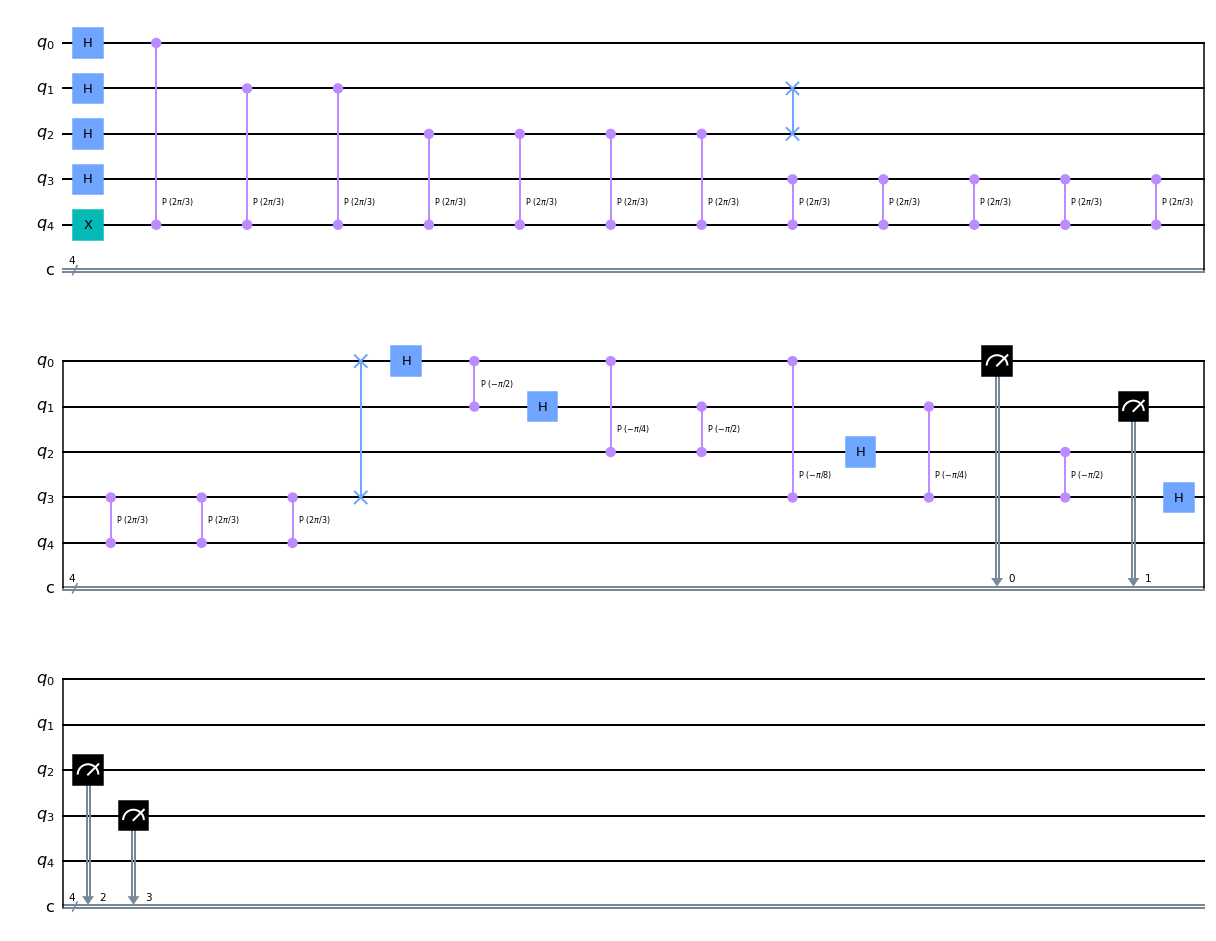

In [5]:
## Start your code to create the circuit, qc4
qc4 = QuantumCircuit(5,4)
# Apply H-Gates to counting qubits:
for qubit in range(4): 
    qc4.h(qubit)
# Prepare our eigenstate |psi>:
qc4.x(4)
# Do the controlled-Unitary operations:
angle = 2*math.pi/3
#angle = 2*.3125
repetitions = 1
for counting_qubit in range(4):
    for i in range(repetitions): 
        qc4.cp(angle, counting_qubit, 4);
    repetitions *= 2 
# Do the inverse QFT:
qft_dagger(qc4, 4)

# Measure of course!
for n in range(4): 
    qc4.measure(n,n)
    
    
qc4.draw(output = 'mpl')

In [6]:
# Let's see the results!
#aer_sim = Aer.get_backend('aer_simulator')
#shots = 20000
#t_qc4 = transpile(qc4, aer_sim)
#qobj = assemble(t_qc4, shots=shots)
#results = aer_sim.run(qobj).result()
#answer = results.get_counts()
#plot_histogram(answer)

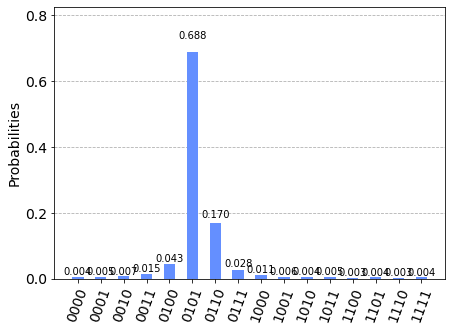

In [7]:
## Run this cell to simulate 'qc4' and to plot the histogram of the result
sim = Aer.get_backend('qasm_simulator')
shots = 20000
count_qc4 = execute(qc4, sim, shots=shots).result().get_counts()
plot_histogram(count_qc4)

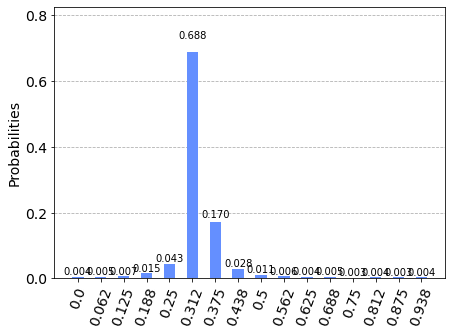

In [8]:
t=4
phi_est = np.array([round(int(key, 2)/2**t,3) for key in list(count_qc4.keys ())])
key_new = list(map(str, phi_est))
count_new = dict(zip(key_new, count_qc4.values())) 
plot_histogram(count_new)

In [9]:
## Step B
## Your code goes here 
t=4
n=2
b = 0.3125
#m_low = b*(1-.25)
#m_high = b*(1 + .25)
#dec_low = m_low * 16
#dec_high = m_high * 16
#e = -1*(dec_high - 5) 
e = 3 #e = 2^(t-n) - 1

In [10]:
## Step C
## Your code goes here
prob1 = (count_new['0.125']+ count_new['0.188']+ count_new['0.25'] + count_new
['0.312']+ count_new['0.375']+count_new['0.438']+count_new['0.5']) / shots
#key_new[1]
#count_new[key_new[1]]
sum = 0
for i in range(16):
    if key_new[i] >= '0.125':
        if key_new[i] <= '0.5':
            sum = sum + count_new[key_new[i]]
prob = sum / shots #shots = 20,000 
prob


0.96205

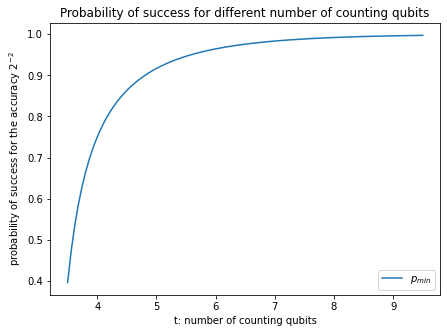

In [11]:
y = lambda t, n: 1-1/(2*(2**(t-n)-2)) 
t_q = np.linspace(3.5, 9.5, 100 ) 
p_min = y(t_q, 2)

plt.figure(figsize=(7, 5))
plt.plot(t_q, p_min, label='$p_{min}$')
plt.xlabel('t: number of counting qubits')
plt.ylabel('probability of success for the accuracy $2^{-2}$') 
plt.legend(loc='lower right')
plt.title('Probability of success for different number of counting qubits') 
plt.show()

In [12]:
 ## Your Code to create the list variable 'circ' goes here
t = [4, 5, 6, 7, 8, 9]

In [13]:
circ = []
for i in range(6):
    ## Start your code to create the circuit
    qc = QuantumCircuit(t[i] + 1, t[i])
    
    # Apply H-Gates to counting qubits:
    for qubit in range(t[i]): 
        qc.h(qubit)
    # Prepare our eigenstate |psi>:
    qc.x(t[i])
    # Do the controlled-Unitary operations:
    angle = 2*math.pi/3
    #angle = 2*.3125
    repetitions = 1
    for counting_qubit in range(t[i]):
        for k in range(repetitions): 
            qc.cp(angle, counting_qubit, t[i]);
        repetitions *= 2 
        
    # Do the inverse QFT:
    qft_dagger(qc, t[i])
    
    
    # Measure of course!
    for n in range(t[i]): 
        qc.measure(n,n)
    circ.append(qc)

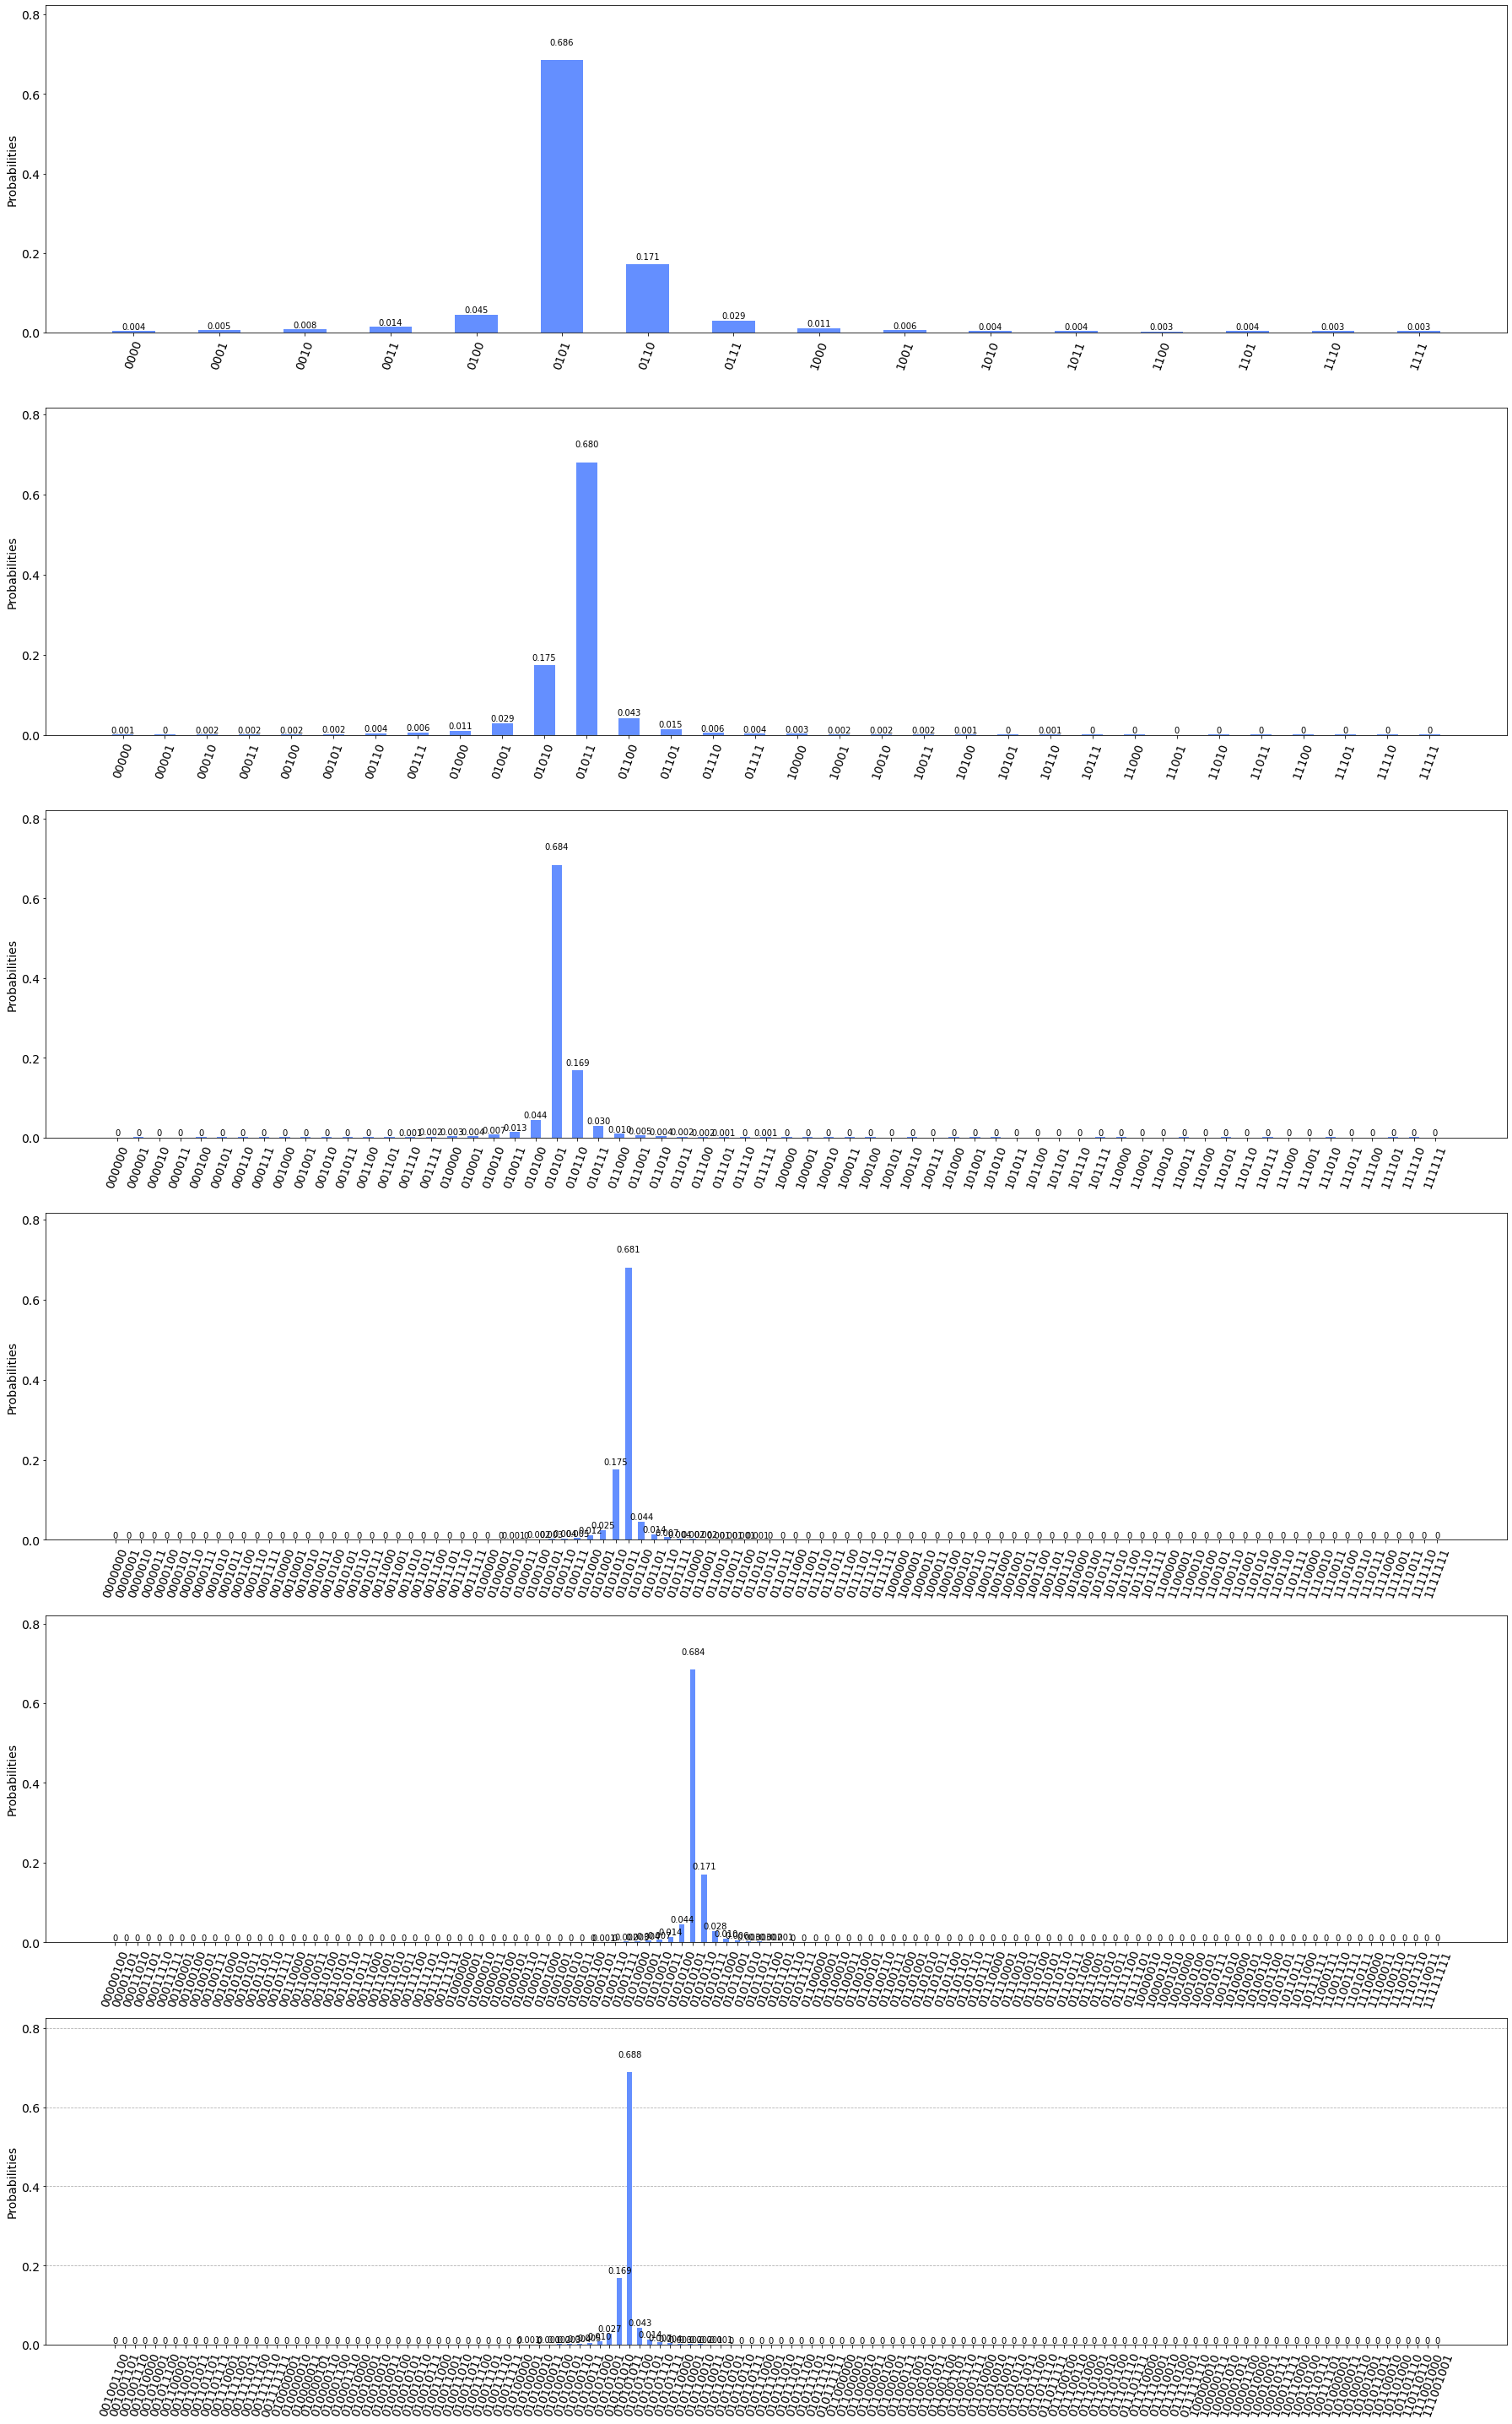

In [14]:
# Run this cell to simulate `circ` and plot the histograms of the results
results = execute(circ, sim, shots=shots).result()
n_circ = len(circ)
counts = [results.get_counts(idx) 
          for idx in range(n_circ)]
fig, ax = plt.subplots(n_circ,1,figsize=(25,40)) 
for idx in range(n_circ):
    plot_histogram(counts[idx], ax=ax[idx])
plt.tight_layout()

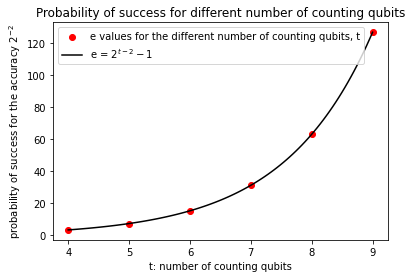

In [15]:
t = [4, 5, 6, 7, 8, 9] 
n=2
e_array = []
for i in range(6): 
    l = t[i] - n
    e = math.pow(2, l) - 1
    e_array.append(e)
e_array
y = lambda t1, n: (2**(t1-n)-1) 
t_q = np.linspace(4, 9, 100) 
p_min = y(t_q, 2)

plt.scatter(t, e_array, c = 'r')
plt.plot(t_q, p_min, c = 'k')
plt.xlabel('t: number of counting qubits')
plt.ylabel('probability of success for the accuracy $2^{-2}$')
plt.legend(['e values for the different number of counting qubits, t', 'e = $2^{t-2}-1$'], loc='upper left')
plt.title('Probability of success for different number of counting qubits')
plt.show()

In [16]:
t0 = t[0]

count_qc0 = execute(circ[0], sim, shots=shots).result().get_counts()
phi_est0 = np.array([round(int(key0, 2)/2**t0,3) for key0 in list(count_qc0.keys())])
key_new0 = list(map(str, phi_est0))
count_new0 = dict(zip(key_new0, count_qc0.values()))

t1 = t[1]

count_qc1 = execute(circ[1], sim, shots=shots).result().get_counts()
phi_est1 = np.array([round(int(key1, 2)/2**t1,3) for key1 in list(count_qc1.keys())])
key_new1 = list(map(str, phi_est1))
count_new1 = dict(zip(key_new1, count_qc1.values()))

t2 = t[2]

count_qc2 = execute(circ[2], sim, shots=shots).result().get_counts()
phi_est2 = np.array([round(int(key2, 2)/2**t2,3) for key2 in list(count_qc2.keys())])
key_new2 = list(map(str, phi_est2))
count_new2 = dict(zip(key_new2, count_qc2.values()))

t3 = t[3]

count_qc3 = execute(circ[3], sim, shots=shots).result().get_counts()
phi_est3 = np.array([round(int(key3, 2)/2**t3,3) for key3 in list(count_qc3.keys())])
key_new3 = list(map(str, phi_est3))
count_new3 = dict(zip(key_new3, count_qc3.values()))

t4 = t[4]

count_qc44 = execute(circ[4], sim, shots=shots).result().get_counts() 
phi_est44 = np.array([round(int(key4, 2)/2**t4,3) for key4 in list(count_qc44. keys())])
key_new44 = list(map(str, phi_est44))
count_new44 = dict(zip(key_new44, count_qc44.values()))

t5 = t[5]
count_qc5 = execute(circ[5], sim, shots=shots).result().get_counts()
phi_est5 = np.array([round(int(key5, 2)/2**t5,3) for key5 in list(count_qc5.keys())])
key_new5 = list(map(str, phi_est5))
count_new5 = dict(zip(key_new5, count_qc5.values()))

In [17]:
#Probability array
prob_success = []

sum = 0
r0 = 2**t[0]
r1 = 2**t[1]
r2 = 2**t[2]
r3 = len(count_new3)
r4 = len(count_new44)
r5 = len(count_new5)

for i in range(r0):
    if key_new0[i] >= '0.125':
        if key_new0[i] <= '0.5':
            sum = sum + count_new0[key_new0[i]]
            
prob0 = sum / shots #shots = 20,000 
prob_success.append(prob0)

sum = 0
for w in range(r1):
    if key_new1[w] >= '0.125':
        if key_new1[w] <= '0.562':
            sum = sum + count_new1[key_new1[w]] 

prob1 = sum / shots #shots = 20,000
prob_success.append(prob1)

sum = 0
for j in range(r2):
    if key_new2[j] >= '0.094':
        if key_new2[j] <= '0.562':
            sum = sum + count_new2[key_new2[j]] 
            
prob2 = sum / shots #shots = 20,000
prob_success.append(prob2)

sum = 0
for p in range(r3):
    if key_new3[p] >= '0.094':
        if key_new3[p] <= '0.578':
            sum = sum + count_new3[key_new3[p]] 
            
prob3 = sum / shots #shots = 20,000
prob_success.append(prob3)

sum = 0
for q in range(r4):
    if key_new44[q] >= '0.0859':
        if key_new44[q] <= '0.578':
            sum = sum + count_new44[key_new44[q]] 

prob4 = sum / shots #shots = 20,000
prob_success.append(prob4)

sum = 0
for q in range(r5):
    if key_new5[q] >= '0.0859':
        if key_new5[q] <= '0.582':
            sum = sum + count_new5[key_new5[q]] 

prob5 = sum / shots #shots = 20,000
prob_success.append(prob5)
prob_success
            

[0.96555, 0.98355, 0.99235, 0.9961, 0.99835, 0.99905]

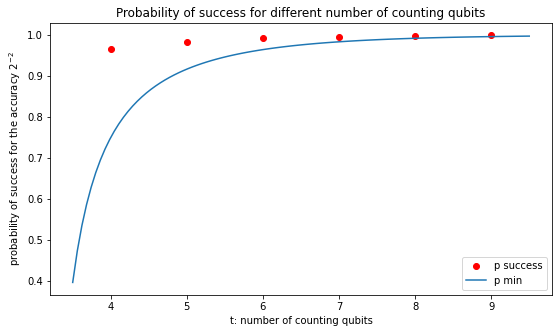

In [18]:
plt.figure(figsize=(9, 5))
plt.scatter(t, prob_success, c = 'r')
y = lambda t, n: 1-1/(2*(2**(t-n)-2)) 
t_q = np.linspace(3.5, 9.5, 100) 
p_min = y(t_q, 2)
plt.plot(t_q, p_min, label='$p_{min}$')
plt.xlabel('t: number of counting qubits')
plt.ylabel('probability of success for the accuracy $2^{-2}$') 
plt.legend(['p success', 'p min'], loc='lower right') 
plt.title('Probability of success for different number of counting qubits') #plt.ylim([0.5, 1.1])
plt.show()

In [ ]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')

In [ ]:
trans_list = [transpile(qc4, backend, optimization_level = 3) 
              for _ in range(50)]
min_depth = min(trans_list, key = lambda x: x.depth()) 
max_depth = max(trans_list, key = lambda x: x.depth()) 
min_max = [min_depth, max_depth]

In [ ]:
print([x.depth() for x in trans_list]) 
print([x.depth() for x in min_max])

In [ ]:
plot_histogram(output.get_counts(), legend = ['best swapping', 'worst swapping'])

In [ ]:
job = execute(min_depth, backend, shots = shots)
print(job.job_id())
job_monitor(job)
min_output = job.result()

In [ ]:
plot_histogram(min_output.get_counts())

In [ ]:
job = execute(max_depth, backend, shots = 8192)
print(job.job_id())
job_monitor(job)
max_output = job.result()

In [ ]:
plot_histogram(max_output.get_counts())

In [ ]:
from qiskit.utils.mitigation import *

In [ ]:
cal_circuits, state_labels = complete_meas_cal(qr = QuantumRegister(4))
# execute the calibration circuits on choice of backend
cal_job = execute(cal_circuits, backend = backend, shots = 8192, optimization_level = 0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results = cal_job.result()

In [ ]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
meas_filter = meas_fitter.filter
mitigated_result = meas_filter.apply(output)

In [ ]:
plot_histogram([output.get_counts()[0], mitigated_result.get_counts()[0], output.get_counts()[1], mitigated_result.get_counts()[1]],
               legend = ['before error mitigation (best swapping)', 'after error mitigation (best swapping)', 'before error mitigation (worst swapping)', 'after error mitigation (worst swapping)'])